In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

In [2]:
df = pd.read_csv('fake_reg.csv')

In [3]:
df

price     feature1     feature2
0    461.527929   999.787558   999.766096
1    548.130011   998.861615  1001.042403
2    410.297162  1000.070267   998.844015
3    540.382220   999.952251  1000.440940
4    546.024553  1000.446011  1000.338531
..          ...          ...          ...
995  476.526078  1000.018988   999.672732
996  457.313186   998.855379  1000.020026
997  456.720992  1001.451646   998.847606
998  403.315576  1000.771023   998.562851
999  599.367093   999.232244  1001.451407

[1000 rows x 3 columns]

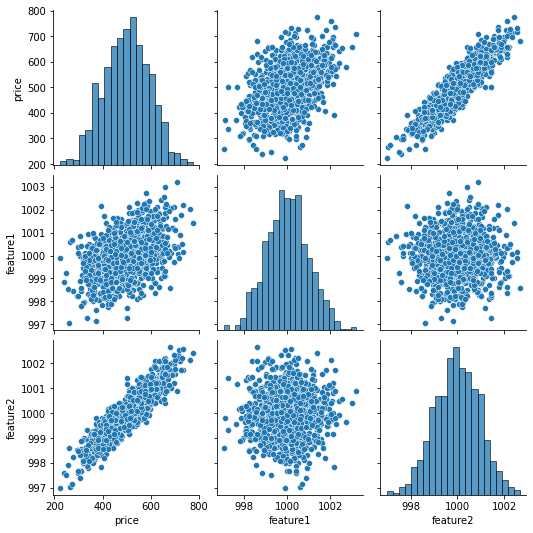

In [4]:
sns.pairplot(df)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df[['feature1', 'feature2']].values

In [7]:
Y = df['price'].values

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 123)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(700, 2)
(300, 2)
(700,)
(300,)


In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

scaler.fit(X_train)

MinMaxScaler()

In [12]:
X_train = scaler.transform(X_train)

In [13]:
X_test = scaler.transform(X_test)

In [14]:
X_train

array([[0.49620773, 0.58240951],
       [0.40992835, 0.50976462],
       [0.48960274, 0.53305069],
       ...,
       [0.62697387, 0.69067328],
       [0.2438302 , 0.48608403],
       [0.13614732, 0.54494817]])

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
# model = Sequential([Dense(4, activation = 'relu'),
#                    Dense(2, activation = 'relu'),
#                    Dense(1)])

In [17]:
model = Sequential()

model.add(Dense(4, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))

model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse')

In [18]:
%%time
model.fit(x = X_train, y = Y_train, epochs = 250)

Epoch 1/250
22/22 [==============================] - 1s 3ms/step - loss: 259789.9688
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 259741.4688
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 259690.8125
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 259633.6250
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 259569.5938
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 259498.1094
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 259418.5781
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 259330.8125
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 259233.1250
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 259126.1719
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 259008.3594
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

22/22 [==============================] - 0s 2ms/step - loss: 114454.0234
Epoch 97/250
22/22 [==============================] - 0s 2ms/step - loss: 110488.7109
Epoch 98/250
22/22 [==============================] - 0s 2ms/step - loss: 106481.6953
Epoch 99/250
22/22 [==============================] - 0s 2ms/step - loss: 102460.6719
Epoch 100/250
22/22 [==============================] - 0s 2ms/step - loss: 98422.0312
Epoch 101/250
22/22 [==============================] - 0s 2ms/step - loss: 94368.5156
Epoch 102/250
22/22 [==============================] - 0s 2ms/step - loss: 90292.8906
Epoch 103/250
22/22 [==============================] - 0s 2ms/step - loss: 86237.5234
Epoch 104/250
22/22 [==============================] - 0s 2ms/step - loss: 82158.3047
Epoch 105/250
22/22 [==============================] - 0s 2ms/step - loss: 78122.8281
Epoch 106/250
22/22 [==============================] - 0s 2ms/step - loss: 74067.9219
Epoch 107/250
22/22 [==============================] - 0s 2ms/step 

22/22 [==============================] - 0s 2ms/step - loss: 909.4186
Epoch 193/250
22/22 [==============================] - 0s 2ms/step - loss: 896.0573
Epoch 194/250
22/22 [==============================] - 0s 2ms/step - loss: 881.9460
Epoch 195/250
22/22 [==============================] - 0s 2ms/step - loss: 868.2477
Epoch 196/250
22/22 [==============================] - 0s 2ms/step - loss: 854.3204
Epoch 197/250
22/22 [==============================] - 0s 2ms/step - loss: 841.2877
Epoch 198/250
22/22 [==============================] - 0s 2ms/step - loss: 826.0039
Epoch 199/250
22/22 [==============================] - 0s 2ms/step - loss: 811.8008
Epoch 200/250
22/22 [==============================] - 0s 2ms/step - loss: 797.0282
Epoch 201/250
22/22 [==============================] - 0s 1ms/step - loss: 780.3001
Epoch 202/250
22/22 [==============================] - 0s 2ms/step - loss: 764.2251
Epoch 203/250
22/22 [==============================] - 0s 2ms/step - loss: 751.0914
Epoch 

In [19]:
loss_df = pd.DataFrame(model.history.history)

In [20]:
loss_df

loss
0    259789.968750
1    259741.468750
2    259690.812500
3    259633.625000
4    259569.593750
..             ...
245     254.819641
246     246.288757
247     238.727722
248     230.015671
249     222.903503

[250 rows x 1 columns]

<AxesSubplot:>

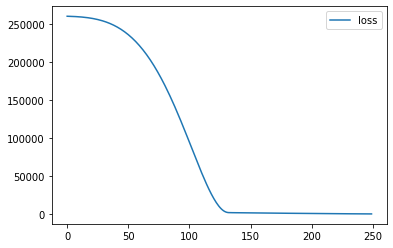

In [21]:
loss_df.plot()

In [22]:
model.evaluate(X_test, Y_test, verbose = 0)

241.42942810058594

In [23]:
model.evaluate(X_train, Y_train, verbose = 0)

217.17361450195312

In [24]:
test_predictions = model.predict(X_test)

In [25]:
test_predictions

array([[372.13818],
       [509.65106],
       [351.85266],
       [546.1691 ],
       [442.93826],
       [508.24463],
       [603.46454],
       [502.63556],
       [647.26227],
       [479.10132],
       [603.88885],
       [457.23157],
       [419.3634 ],
       [373.67175],
       [451.87598],
       [493.35205],
       [640.01404],
       [543.90497],
       [551.5651 ],
       [435.4702 ],
       [361.0644 ],
       [503.8526 ],
       [531.8785 ],
       [502.90283],
       [596.39557],
       [391.58408],
       [465.65326],
       [498.6329 ],
       [398.55835],
       [432.22034],
       [517.1835 ],
       [596.7778 ],
       [445.29413],
       [694.10284],
       [573.1153 ],
       [466.5369 ],
       [570.0918 ],
       [504.1538 ],
       [453.94977],
       [561.9322 ],
       [608.73944],
       [731.9538 ],
       [379.18622],
       [535.9056 ],
       [612.8415 ],
       [686.84814],
       [535.5675 ],
       [509.29694],
       [679.1523 ],
       [416.7584 ],


In [26]:
test_predictions = pd.Series(test_predictions.reshape(300, ))

In [27]:
pred_df = pd.DataFrame(Y_test, columns = ['Test True Y'])

In [28]:
pred_df = pd.concat([pred_df, test_predictions], axis = 1)

In [29]:
pred_df.columns = ['Test True Y', 'Model Predictions']

<AxesSubplot:xlabel='Test True Y', ylabel='Model Predictions'>

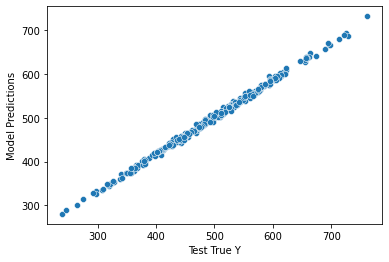

In [30]:
sns.scatterplot(x = 'Test True Y', y = 'Model Predictions', data = pred_df)

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [32]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

12.633455371234504

In [33]:
df.describe()

price     feature1     feature2
count  1000.000000  1000.000000  1000.000000
mean    498.673029  1000.014171   999.979847
std      93.785431     0.974018     0.948330
min     223.346793   997.058347   996.995651
25%     433.025732   999.332068   999.316106
50%     502.382117  1000.009915  1000.002243
75%     564.921588  1000.637580  1000.645380
max     774.407854  1003.207934  1002.666308

In [34]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])

241.42943371846894

In [35]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])**0.5

15.537999669148823

In [36]:
new_gem = [[998, 1000]]

In [37]:
new_gem = scaler.transform(new_gem)

In [38]:
model.predict(new_gem)

array([[432.4096]], dtype=float32)

In [39]:
from tensorflow.keras.models import load_model
model.save('my_gem_model.h5')

In [40]:
later = load_model('my_gem_model.h5')

In [41]:
later.predict(new_gem)

array([[432.4096]], dtype=float32)